In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [9]:
N = 65
x_0 = 5
d = 5
zero = np.zeros(2*N)
dx = 1 

### Zadanie 1

In [10]:
def GestoscLadunku(x,y):
    ro = np.exp(-(np.power((x-x_0),2)+np.power(y,2))/np.power(d,2)) - np.exp(-(np.power((x+x_0),2)+np.power(y,2))/np.power(d,2))
    return ro


In [11]:
siatka_1 = np.flip(np.fromfunction(lambda i, j: GestoscLadunku(i,j),(N,N)),0)
siatka_2 = np.flip(np.flip(np.fromfunction(lambda i, j: GestoscLadunku(i,-j),(N,N)),1),0)
siatka_3 = np.flip(np.fromfunction(lambda i, j: GestoscLadunku(-i,-j),(N,N)),1)
siatka_4 = np.fromfunction(lambda i, j: GestoscLadunku(-i,j),(N,N))

In [12]:
siatka_21 = np.concatenate((siatka_2, siatka_1), axis = 1)
siatka_34 = np.concatenate((siatka_3, siatka_4), axis = 1)
siatka = np.concatenate((siatka_21, siatka_34), axis = 0)
siatka[0], siatka.T[0], siatka[2*N-1], siatka.T[2*N-1] = 0,0,0,0

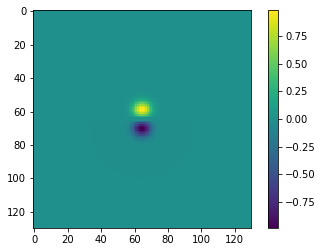

In [13]:
plt.imshow(siatka)
plt.colorbar()

In [14]:

siatka_ro = siatka

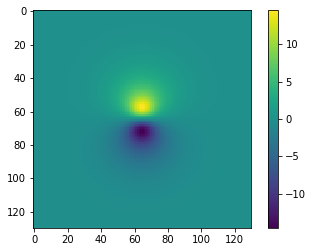

In [15]:
siatka_a = np.zeros((2*N,2*N))
siatka_b = np.zeros((2*N,2*N))
siatka_c = np.zeros((2*N,2*N))
temp = np.zeros((2*N,2*N))
for z in range(1000):
    for i in range(1,2*N-1):
        siatka_a[i] = temp[i-1] + temp[i+1]
        siatka_b.T[i] = temp.T[i-1] + temp.T[i+1]
    siatka_c = siatka_a + siatka_b
    temp = (siatka_c + siatka_ro * dx * dx)/4
plt.imshow(temp)
plt.colorbar()

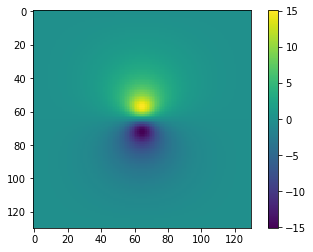

In [16]:
siatka_a = np.zeros((2*N,2*N))
siatka_b = np.zeros((2*N,2*N))
siatka_c = np.zeros((2*N,2*N))
temp = np.zeros((2*N,2*N))
for z in range(2000):
    for i in range(1,2*N-1):
        siatka_a[i] = temp[i-1] + temp[i+1]
        siatka_b.T[i] = temp.T[i-1] + temp.T[i+1]
    siatka_c = siatka_a + siatka_b
    temp = (siatka_c + siatka_ro * dx * dx)/4
po_2000 = temp
plt.imshow(temp)
plt.colorbar()

In [17]:
temp = np.zeros((2*N,2*N))
siatka_a = np.zeros((2*N,2*N))
siatka_b = np.zeros((2*N,2*N))
siatka_c = np.zeros((2*N,2*N))
siatka_d = np.zeros((2*N,2*N))
siatka_e = np.zeros((2*N,2*N))
a = np.zeros((1000))

for z in range(1000):
    for i in range(1,2*N-1):
        
        siatka_a[i] = temp[i-1] + temp[i+1]
        siatka_b.T[i] = temp.T[i-1] + temp.T[i+1]

        siatka_c[i] = 0.5 * np.power((temp[i+1] - temp[i-1])/(2*dx),2)
        siatka_d.T[i] = 0.5 * np.power((temp.T[i+1] - temp.T[i-1])/(2*dx),2)
        
    a_array = siatka_c + siatka_d - siatka_ro * temp
    siatka_e = siatka_a + siatka_b
    temp = (siatka_e + siatka_ro * dx * dx)/4
    a[z] = np.sum(np.sum(a_array,0))

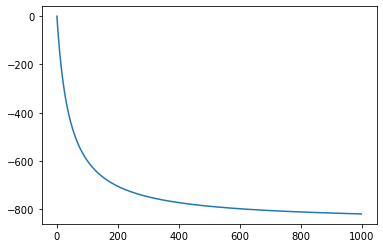

In [18]:
plt.plot(a)

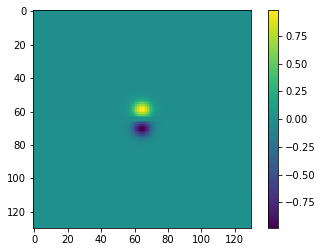

In [19]:
siatka_a = np.zeros((2*N,2*N))
siatka_b = np.zeros((2*N,2*N))
siatka_c = np.zeros((2*N,2*N))

for i in range(1,2*N-1):
    siatka_a[i] = temp[i-1] + temp[i+1]
    siatka_b.T[i] = temp.T[i-1] + temp.T[i+1]
siatka_c = siatka_a + siatka_b
temp = -(siatka_c - 4 * temp)/(dx*dx)
plt.imshow(temp)
plt.colorbar()

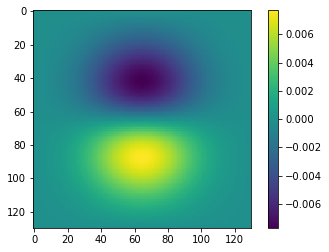

In [20]:
plt.imshow(temp - siatka_ro)
plt.colorbar()

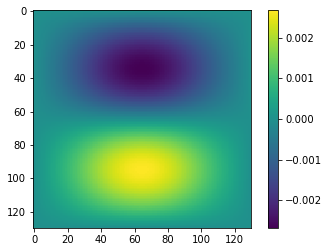

In [21]:
siatka_a = np.zeros((2*N,2*N))
siatka_b = np.zeros((2*N,2*N))
siatka_c = np.zeros((2*N,2*N))
temp = po_2000
for i in range(1,2*N-1):
    siatka_a[i] = temp[i-1] + temp[i+1]
    siatka_b.T[i] = temp.T[i-1] + temp.T[i+1]
siatka_c = siatka_a + siatka_b
temp = -(siatka_c - 4 * temp)/(dx*dx)
plt.imshow(temp - siatka_ro)
plt.colorbar()

### Zadanie 2

In [81]:
siatka_a = np.zeros((2*N,2*N))
siatka_b = np.zeros((2*N,2*N))

w = np.arange(1.9,1.955,0.005)
a = np.zeros((len(w),200))
temp = np.zeros((2*N,2*N))

for j in range(len(w)):
    for z in range(200):
        for i in range(1,2*N-1):
            for k in range(1,2*N-1):

                temp[i][k] = w[j]*(temp[i-1][k] + temp[i+1][k] + temp[i][k+1] + temp[i][k-1] + siatka_ro[i][k] * dx * dx)/4 + (1-w[j]) * temp[i][k]

                a_array[i][k] = dx * dx * (0.5 * math.pow((temp[i+1][k] - temp[i-1][k])/(2*dx),2) + 0.5 * math.pow((temp.T[i][k+1] - temp.T[i][k-1])/(2*dx),2) - siatka_ro[i][k]*temp[i][k])

        a[j][z] = np.sum(np.sum(a_array,0))

    temp = np.zeros((2*N,2*N))

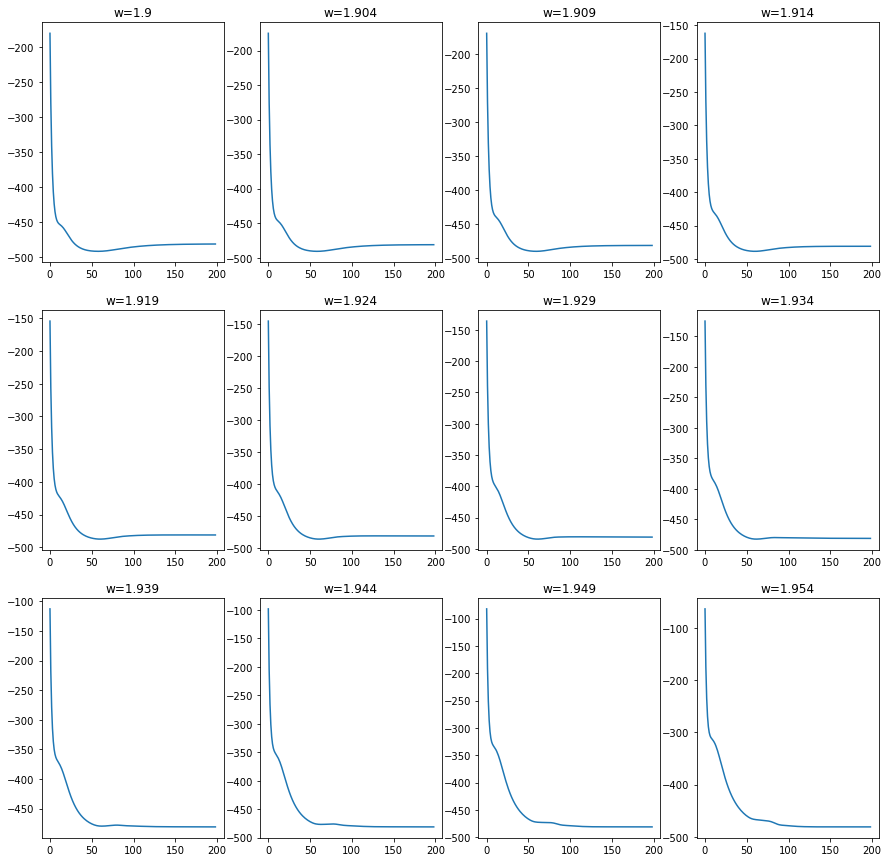

In [24]:
plt.figure(figsize=(15,15))
for i in range(len(a)):
    plt.subplot(3,4,i+1)
    plt.title("w="+ str(int(w[i]*1000)/1000))
    plt.plot(a[i][1:200])

In [162]:
delta_a = np.zeros((len(a),200))
for i in range(len(a)):
    for j in range(199):
        delta_a[i][j] = a[i][j] - a[i][j+1]


array([[ 1.84839162e+02,  9.92560662e+01,  6.13553395e+01, ...,
        -4.68852644e-03, -4.49717278e-03,  0.00000000e+00],
       [ 1.88842526e+02,  9.97964226e+01,  6.12205821e+01, ...,
        -2.43088423e-03, -2.30200627e-03,  0.00000000e+00],
       [ 1.93203195e+02,  1.00373849e+02,  6.10749141e+01, ...,
        -6.34826499e-04, -5.61783731e-04,  0.00000000e+00],
       ...,
       [ 2.40599366e+02,  1.07039606e+02,  6.01917504e+01, ...,
         1.98235935e-03,  1.90203897e-03,  0.00000000e+00],
       [ 2.51446173e+02,  1.08828812e+02,  6.02405806e+01, ...,
         2.54844704e-03,  2.32636327e-03,  0.00000000e+00],
       [ 2.64025933e+02,  1.11060729e+02,  6.04199147e+01, ...,
         3.75211226e-03,  3.10529013e-03,  0.00000000e+00]])

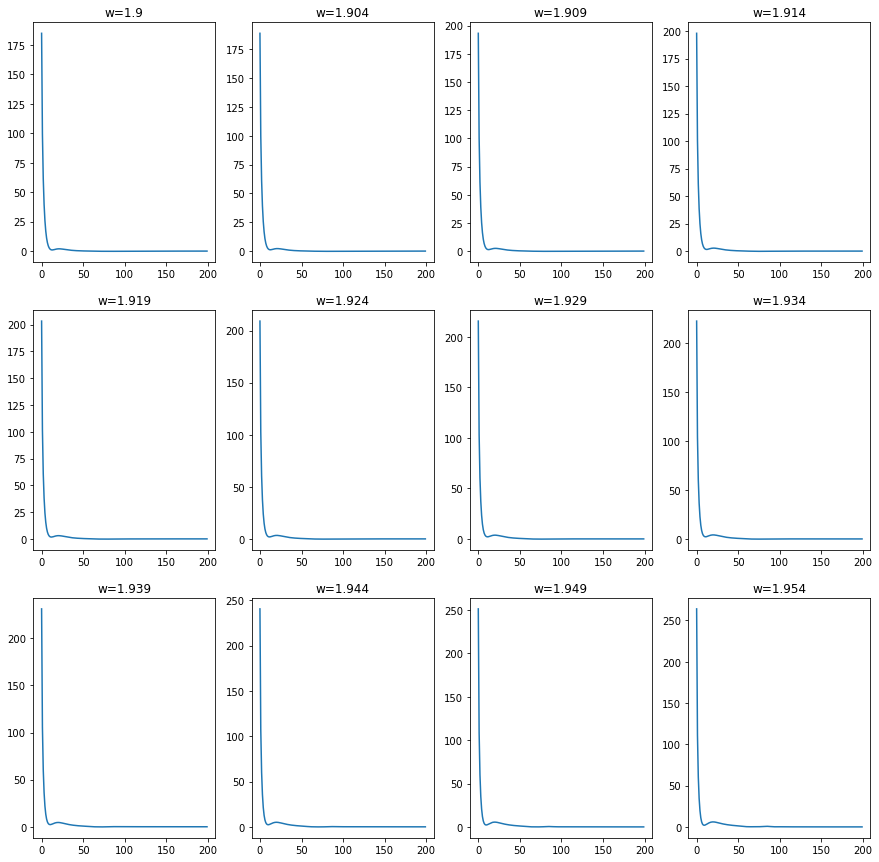

In [163]:
plt.figure(figsize=(15,15))
for i in range(len(a)):
    plt.subplot(3,4,i+1)
    plt.title("w="+ str(int(w[i]*1000)/1000))
    plt.plot(delta_a[i])

In [183]:
optimum = []
sigma = 0.00005
for j in range(len(a)):
    for i in range(190):
        if abs(delta_a[j][i]) < sigma:
            optimum.append([j,i])
print('najszybciej zbiega funkcja z współczynnikiem w równym:',w[optimum[0][0]])

najszybciej zbiega funkcja z współczynnikiem w równym: 1.9149999999999996


In [204]:
w = [1.915]
a = np.zeros((len(w),1000))
temp = np.zeros((2*N,2*N))
ro = np.zeros((len(w),2*N,2*N))

for j in range(len(w)):
    for z in range(1000):
        for i in range(1,2*N-1):
            for k in range(1,2*N-1):
                
                ro[j] = -(temp[i-1][k] + temp[i+1][k] + temp[i][k+1] + temp[i][k-1] - 4*temp[i][k])/(dx*dx)
                temp[i][k] = w[j]*(temp[i-1][k] + temp[i+1][k] + temp[i][k+1] + temp[i][k-1] + siatka_ro[i][k] * dx * dx)/4 + (1-w[j]) * temp[i][k]

                a_array[i][k] = dx * dx * (0.5 * math.pow((temp[i+1][k] - temp[i-1][k])/(2*dx),2) + 0.5 * math.pow((temp.T[i][k+1] - temp.T[i][k-1])/(2*dx),2) - siatka_ro[i][k]*temp[i][k])

        a[j][z] = np.sum(np.sum(a_array,0))



Text(0.5, 1.0, 'w=1.915')

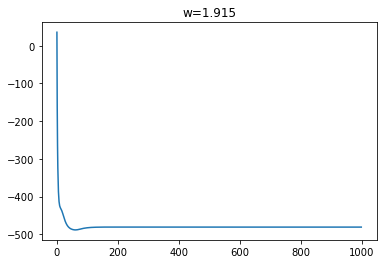

In [186]:
plt.plot(a[0])
plt.title('w=1.915')

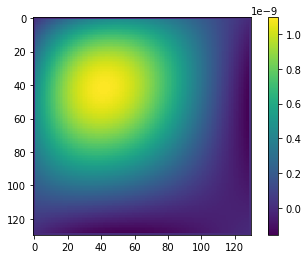

In [209]:
siatka_a = np.zeros((2*N,2*N))
siatka_b = np.zeros((2*N,2*N))
siatka_c = np.zeros((2*N,2*N))
# temp = po_2000
for i in range(1,2*N-1):
    siatka_a[i] = temp[i-1] + temp[i+1]
    siatka_b.T[i] = temp.T[i-1] + temp.T[i+1]
siatka_c = siatka_a + siatka_b
temp = -(siatka_c - 4 * temp)/(dx*dx)
plt.imshow(temp - siatka_ro)
plt.colorbar()